In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Import and prepare data

In [5]:
data_path = "/Users/danielbrand/Documents/Uni/Master/2. Semester/Artificial Intelligence & Robotics/Final Project/telco_final.csv"
data = pd.read_csv(data_path)

In [6]:
data["churn"].value_counts()

No     5163
Yes    1869
Name: churn, dtype: int64

In [7]:
class_distribution = 5163/(5163+1869)
print(class_distribution)

0.7342150170648464


# Set features and target value

In [8]:
rfecv_features = ['is_male', 'is_senior_citizen', 'has_partner', 'has_dependents',
       'tenure', 'has_phone_service', 'has_paperless_billing',
       'monthly_charges', 'total_charges', 'has_multiple_lines_No',
       'has_multiple_lines_No phone service', 'has_multiple_lines_Yes',
       'has_internet_service_DSL', 'has_internet_service_Fiber optic',
       'has_internet_service_No', 'has_online_security_No',
       'has_online_security_Yes', 'has_online_backup_No internet service',
       'has_online_backup_Yes', 'has_device_protection_No',
       'has_device_protection_Yes', 'has_tech_support_No',
       'has_tech_support_No internet service', 'has_tech_support_Yes',
       'has_streaming_TV_No', 'has_streaming_TV_Yes',
       'has_streaming_movies_No', 'has_streaming_movies_No internet service',
       'has_streaming_movies_Yes', 'contract_Month-to-month',
       'contract_One year', 'contract_Two year',
       'payment_method_Bank transfer (automatic)',
       'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check']

In [9]:
X = data[rfecv_features]
y = data["churn"]

# Find the optimum number of estimators (trees) for the Random Forest
##### To do this we run a five fold nested cross validation, each time increasing the number of trees by 500 and afterwards print the mean accuracy across the five folds 

In [12]:
def opt_n_estimators():
    estimators = np.arange(10, 10000,500)
    accuracy = []
    
    for e in estimators:
        clf = RandomForestClassifier(n_estimators=e, n_jobs=-1, random_state=0)
        val_scores = cross_val_score(clf, X, y, cv=5)
        mean_accuracy = val_scores.mean()
        standard_dev = val_scores.std() * 2
        accuracy.append(mean_accuracy)
        print("Number of estimators: {} \t\t Mean accuracy: {} (+/- {})".format(e, mean_accuracy, standard_dev))
    
    return(accuracy)

In [10]:
opt_n_estimators()

Number of estimators: 100 		 Mean accuracy: 0.7875465789476742 (+/- 0.0248245759007599)
Number of estimators: 1100 		 Mean accuracy: 0.7903905181623911 (+/- 0.02672886513531854)
Number of estimators: 2100 		 Mean accuracy: 0.7893945835318947 (+/- 0.02106248291762119)
Number of estimators: 3100 		 Mean accuracy: 0.7889677396121948 (+/- 0.021051001405343668)
Number of estimators: 4100 		 Mean accuracy: 0.7888262002323275 (+/- 0.02471265503243503)
Number of estimators: 5100 		 Mean accuracy: 0.7903896081196878 (+/- 0.021608247888854164)
Number of estimators: 6100 		 Mean accuracy: 0.7891101894665086 (+/- 0.020619122021817805)
Number of estimators: 7100 		 Mean accuracy: 0.7901063271602223 (+/- 0.02164333478877871)
Number of estimators: 8100 		 Mean accuracy: 0.789679382140657 (+/- 0.022243496502401018)
Number of estimators: 9100 		 Mean accuracy: 0.7906743056285845 (+/- 0.021954625935394607)


[0.7875465789476742,
 0.7903905181623911,
 0.7893945835318947,
 0.7889677396121948,
 0.7888262002323275,
 0.7903896081196878,
 0.7891101894665086,
 0.7901063271602223,
 0.789679382140657,
 0.7906743056285845]

In [13]:
opt_n_estimators()

Number of estimators: 10 		 Mean accuracy: 0.7737491715432692 (+/- 0.016284465866846325)
Number of estimators: 510 		 Mean accuracy: 0.7889667280378828 (+/- 0.018885142153414847)
Number of estimators: 1010 		 Mean accuracy: 0.791100239073838 (+/- 0.020901172188557277)
Number of estimators: 1510 		 Mean accuracy: 0.7911010481605902 (+/- 0.0223661681409541)
Number of estimators: 2010 		 Mean accuracy: 0.7902473606090192 (+/- 0.022064958257361926)
Number of estimators: 2510 		 Mean accuracy: 0.7899635734306545 (+/- 0.02153426984213719)
Number of estimators: 3010 		 Mean accuracy: 0.790105719985372 (+/- 0.022161918894185405)
Number of estimators: 3510 		 Mean accuracy: 0.7893943809004207 (+/- 0.020642919875843765)
Number of estimators: 4010 		 Mean accuracy: 0.7896787748218924 (+/- 0.020248518338980934)
Number of estimators: 4510 		 Mean accuracy: 0.7891102904224596 (+/- 0.020038312408533702)
Number of estimators: 5010 		 Mean accuracy: 0.7888258965009879 (+/- 0.02042492585956943)
Number o

[0.7737491715432692,
 0.7889667280378828,
 0.791100239073838,
 0.7911010481605902,
 0.7902473606090192,
 0.7899635734306545,
 0.790105719985372,
 0.7893943809004207,
 0.7896787748218924,
 0.7891102904224596,
 0.7888258965009879,
 0.7893947855877113,
 0.7896791795091829,
 0.7899638770180797,
 0.7898215282636312,
 0.7895372355859394,
 0.7895371343421596,
 0.789679483096608,
 0.789394886831491,
 0.7896790784093175]

### Using 1500 estimators as a base because it delivers high accuracy while being both computer memory and time efficient
# Find the optimum value for the "max_features" parameter
##### max_features affects the number of features taken into consideration at each split. If set to all features, no randomness is injected, if set to 1 randomness is maximized and the model can only vary the threshold for the feature. With a high number for max_features, trees will be more similiar to each other and thus will fit the data more easily --> more prone to overfitting

In [28]:
acc_features = []

In [29]:

def opt_max_features():
    max_features = np.arange(1, 36, 1)

    for feature in max_features:
        clf = RandomForestClassifier(n_estimators=1500, n_jobs=-1, random_state=0, max_features=feature)
        val_scores = cross_val_score(clf, X, y, cv=5)
        mean_accuracy = val_scores.mean()
        standard_dev = val_scores.std() * 2
        acc_features.append(mean_accuracy)
        print("Number of features: {} \t\t Mean accuracy: {} (+/- {})".format(feature, mean_accuracy, standard_dev))
        
    return(acc_features)

In [30]:
opt_max_features()

Number of features: 1 		 Mean accuracy: 0.7841315248661361 (+/- 0.022809355277730148)
Number of features: 2 		 Mean accuracy: 0.7874027129756723 (+/- 0.02365484803784758)
Number of features: 3 		 Mean accuracy: 0.7879718046938697 (+/- 0.02152533452842791)
Number of features: 4 		 Mean accuracy: 0.7891094814796218 (+/- 0.017876947462134248)
Number of features: 5 		 Mean accuracy: 0.7909585983062766 (+/- 0.02144492283280446)
Number of features: 6 		 Mean accuracy: 0.7905321592177815 (+/- 0.022515828827768345)
Number of features: 7 		 Mean accuracy: 0.7888264024320584 (+/- 0.0229243109627515)
Number of features: 8 		 Mean accuracy: 0.7879712977553984 (+/- 0.023100569013311315)
Number of features: 9 		 Mean accuracy: 0.7872604648893461 (+/- 0.01846343102234642)
Number of features: 10 		 Mean accuracy: 0.7875443533114905 (+/- 0.019320240188984983)
Number of features: 11 		 Mean accuracy: 0.7876879154082388 (+/- 0.021806946013522677)
Number of features: 12 		 Mean accuracy: 0.785553999684993

[0.7841315248661361,
 0.7874027129756723,
 0.7879718046938697,
 0.7891094814796218,
 0.7909585983062766,
 0.7905321592177815,
 0.7888264024320584,
 0.7879712977553984,
 0.7872604648893461,
 0.7875443533114905,
 0.7876879154082388,
 0.785553999684993,
 0.7862646307830575,
 0.7868323059518236,
 0.7886819287095486,
 0.7855530893544609,
 0.7879698817816246,
 0.786121371698077,
 0.784841548213693,
 0.786121472654028,
 0.7842735694575019,
 0.7856949324656677,
 0.7845584695978727,
 0.783845916594964,
 0.783705085345898,
 0.7831348809535233,
 0.7829933418614848,
 0.7835617248732232,
 0.7828518024816175,
 0.7814290233557635,
 0.7811440226911848,
 0.7818555636880383,
 0.7801492000152938,
 0.7811448316340227,
 0.781855766175598]

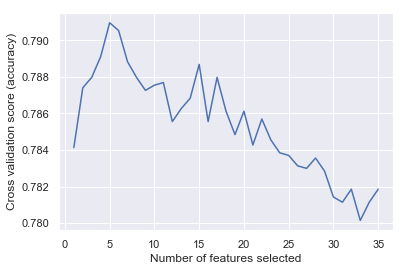

In [32]:
sns.set()
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)") 
plt.plot(range(1, len(acc_features) + 1), acc_features)
plt.show()

### The highest accuracy is achieved when the max_features parameter is set to 5, therefore, this will be used from now on
# Find the optimum depth for the trees
##### The "max_depth" parameter specifies how often a tree can split itself up until it stops. the deeper the tree, the purer the nodes become. This increases the fit to the dataset but also encourages overfitting.

In [38]:
acc_depth = []

def opt_max_depth():
    depth = np.arange(1, 20, 1)
    
    for d in depth:
        clf = RandomForestClassifier(n_estimators=1500, max_features=5, n_jobs=-1, random_state=0, max_depth=d)
        val_scores = cross_val_score(clf, X, y, cv=5)
        mean_accuracy = val_scores.mean()
        standard_dev = val_scores.std() * 2
        acc_depth.append(mean_accuracy)
        print("Depth: {} \t\t Mean accuracy: {} (+/- {})".format(d, mean_accuracy, standard_dev))
        
    return(acc_depth)

In [39]:
opt_max_depth()

Depth: 1 		 Mean accuracy: 0.7342150726795958 (+/- 0.0003378844320375541)
Depth: 2 		 Mean accuracy: 0.7542653031223476 (+/- 0.008277556001910304)
Depth: 3 		 Mean accuracy: 0.7849861228921536 (+/- 0.011478351585894941)
Depth: 4 		 Mean accuracy: 0.7922382194470152 (+/- 0.016179999361387577)
Depth: 5 		 Mean accuracy: 0.7947977650280892 (+/- 0.018170806841329466)
Depth: 6 		 Mean accuracy: 0.7986369317499021 (+/- 0.02056410913582979)
Depth: 7 		 Mean accuracy: 0.8020492546959297 (+/- 0.023916393866236178)
Depth: 8 		 Mean accuracy: 0.8024751884290117 (+/- 0.021666350174521135)
Depth: 9 		 Mean accuracy: 0.8006265768138554 (+/- 0.02311109291097302)
Depth: 10 		 Mean accuracy: 0.8007684196372334 (+/- 0.023415540364603835)
Depth: 11 		 Mean accuracy: 0.7980668287452217 (+/- 0.0219529037399826)
Depth: 12 		 Mean accuracy: 0.7967880171229784 (+/- 0.020960835651485574)
Depth: 13 		 Mean accuracy: 0.793943976088824 (+/- 0.01931019464276135)
Depth: 14 		 Mean accuracy: 0.7918113753834011 (+/- 

[0.7342150726795958,
 0.7542653031223476,
 0.7849861228921536,
 0.7922382194470152,
 0.7947977650280892,
 0.7986369317499021,
 0.8020492546959297,
 0.8024751884290117,
 0.8006265768138554,
 0.8007684196372334,
 0.7980668287452217,
 0.7967880171229784,
 0.793943976088824,
 0.7918113753834011,
 0.7916685211296255,
 0.7889669303815282,
 0.7905328673485827,
 0.7888250871264069,
 0.7892519311900212]

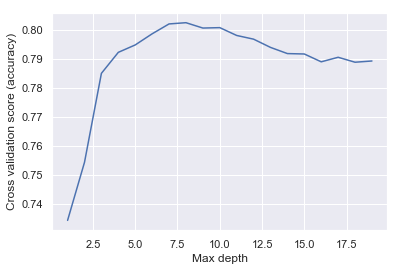

In [40]:
sns.set()
plt.figure()
plt.xlabel("Max depth")
plt.ylabel("Cross validation score (accuracy)") 
plt.plot(range(1, len(acc_depth) + 1), acc_depth)
plt.show()

### A depth of 8 achieves the maximum accuracy. Therefore the final Forest will have the following parameters:
##### n_estimators = 1500
##### max_features = 5
##### max_depth = 8
# Building the final tree with a training and a test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
rf = RandomForestClassifier(n_estimators=1500, max_features=5, max_depth=8, n_jobs=-1, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [11]:
y_true = y_test
y_pred = rf.predict(X_test)

# Model Evaluation - Confusion Matrix and Expected Value

In [12]:
matrix = confusion_matrix(y_true, y_pred, labels=["Yes", "No"])

In [14]:
conf_matrix = pd.DataFrame({'Yes':matrix[:,0],'No':matrix[:,1]}, index=["Positive", "Negative"])

In [15]:
conf_matrix

,Yes,No
Positive,222,225
Negative,117,1194


In [60]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

In [63]:
positive_rate = (tp + fn) / y_true.count()
negative_rate = (fp + tn) / y_true.count()
print(positive_rate)

0.25426621160409557


In [64]:
tp_rate = tp/ (tp + fn)
fp_rate = fp/ (fp + tn)
fn_rate = fn/ (tp + fn) 
tn_rate = tn/ (fp + tn)
print(tp_rate)
print(fp_rate)
print(fn_rate)
print(tn_rate)

0.4966442953020134
0.08924485125858124
0.5033557046979866
0.9107551487414187
